___

<p style="text-align: center;"><img src="https://docs.google.com/uc?id=1lY0Uj5R04yMY3-ZppPWxqCr5pvBLYPnV" class="img-fluid" alt="CLRSWY"></p>

___

# WELCOME!

Welcome to "***Fraud Detection Project***". This is the last project of the Capstone Series.

One of the challenges in this project is the absence of domain knowledge. So without knowing what the column names are, you will only be interested in their values. The other one is the class frequencies of the target variable are quite imbalanced.

You will implement ***Logistic Regression, Random Forest, XGBoost,and Neural Network*** algorithms and ***Unbalanced Data Techniques*** . Also visualize performances of the models using ***Seaborn, Matplotlib*** and ***Yellowbrick*** in a variety of ways.

Data drift and model drirft are key consepts about ML and MLOPS, you can monitor and check your data and models with plenty of ways and tools. ***Deepchecks*** is one of them and the leading tool for testing and for validating your machine learning models and data, and it enables doing so with minimal effort. In this project, you will apply ***Data Integrity, Train-Test Validation, and Model Evaluation*** checks.
Deepchecks Intruduction : https://youtu.be/7ELdizoi6BU

At the end of the project, you will have the opportunity to deploy your model by ***Streamlit API***.

Before diving into the project, please take a look at the Determines and Tasks.

- ***NOTE:*** *This tutorial assumes that you already know the basics of coding in Python and are familiar with model deployement (Streamlit) as well as the theory behind algorithms*



---
---


# #Determines
The datasets contains transactions made by credit cards in September 2013 by european cardholders. This dataset presents transactions that occurred in two days, where it has **492 frauds** out of **284,807** transactions. The dataset is **highly unbalanced**, the positive class (frauds) account for 0.172% of all transactions.

**Feature Information:**

**Time**: This feature is contains the seconds elapsed between each transaction and the first transaction in the dataset. 

**Amount**:  This feature is the transaction Amount, can be used for example-dependant cost-senstive learning. 

**Class**: This feature is the target variable and it takes value 1 in case of fraud and 0 otherwise.

---

The aim of this project is to predict whether a credit card transaction is fraudulent. Of course, this is not easy to do.
First of all, you need to analyze and recognize your data well in order to draw your roadmap and choose the correct arguments you will use. Accordingly, you can examine the frequency distributions of variables. You can observe variable correlations and want to explore multicollinearity. You can display the distribution of the target variable's classes over other variables. 
Also, it is useful to take missing values and outliers.

After these procedures, you can move on to the model building stage by doing the basic data pre-processing you are familiar with. 

Start with Logistic Regression and evaluate model performance. You will apply the Unbalanced Data Techniques used to increase the performance. Next, observe their effects.

Then, you will use four different algorithms in the model building phase. 

In the final step, you will deploy your model using ***Streamlit API***. 

**Optional**: You can Dockerize your project and deploy on cloud.

---
---


# #Tasks

#### 1. Exploratory Data Analysis & Data Cleaning

- Import Modules, Load Data & Data Review
- Apply data integrity checks
- Exploratory Data Analysis
- Data Cleaning
    
#### 2. Data Preprocessing

- Train - Test Split
- Train - Test Split Validation Checks
- Scaling

#### 3. Model Building

- Logistic Regression 
- Random Forest Classifier
- XGBoost Classifier
- Neural Network
- 

#### 4. Model Deployement

- Save and Export the Best Model
- Save and Export Variables




---
---


## 1. Exploratory Data Analysis & Data Cleaning

### Import Modules, Load Data & Data Review

In [4]:
# !pip install missingno
# !pip install pyforest
# !pip install cufflinks
# !pip install termcolor
# !pip install wordcloud
# !pip install squarify
# !pip install pyclustertend
# !pip install yellowbrick --user
# !pip install matplotlib==3.3.3
# !pip install colorama #(for colab)
# !pip install squarify
# from termcolor import colored

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats
import matplotlib.pyplot as plt
%matplotlib inline
import statsmodels.api as sm
import statsmodels.formula.api as smf
import missingno as msno

from sklearn.compose import make_column_transformer

# Scaling
from sklearn.preprocessing import scale
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import PowerTransformer
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import RobustScaler

# Importing plotly and cufflinks in offline mode
import cufflinks as cf
import plotly.offline
cf.go_offline()
cf.set_config_file(offline=False, world_readable=True)

# Ignore Warnings
import warnings
warnings.filterwarnings("ignore")
warnings.warn("this will not show")

# Figure&Display options
plt.rcParams["figure.figsize"] = (10,6)
pd.set_option('max_colwidth',200)
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 200)
pd.set_option('display.float_format', lambda x: '%.3f' % x)

import ipywidgets
from ipywidgets import interact

# White grid plots for dark mode users
sns.set_style("whitegrid")

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
df = pd.read_csv("/content/drive/MyDrive/Notebooks/Capstone_Projects/Capstone_3_Fraud_Detection/creditcard.csv")
df1 = df.copy()
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.000,-1.360,-0.073,2.536,1.378,-0.338,0.462,0.240,0.099,0.364,0.091,-0.552,-0.618,-0.991,-0.311,1.468,-0.470,0.208,0.026,0.404,0.251,-0.018,0.278,-0.110,0.067,0.129,-0.189,0.134,-0.021,149.620,0
1,0.000,1.192,0.266,0.166,0.448,0.060,-0.082,-0.079,0.085,-0.255,-0.167,1.613,1.065,0.489,-0.144,0.636,0.464,-0.115,-0.183,-0.146,-0.069,-0.226,-0.639,0.101,-0.340,0.167,0.126,-0.009,0.015,2.690,0
2,1.000,-1.358,-1.340,1.773,0.380,-0.503,1.800,0.791,0.248,-1.515,0.208,0.625,0.066,0.717,-0.166,2.346,-2.890,1.110,-0.121,-2.262,0.525,0.248,0.772,0.909,-0.689,-0.328,-0.139,-0.055,-0.060,378.660,0
3,1.000,-0.966,-0.185,1.793,-0.863,-0.010,1.247,0.238,0.377,-1.387,-0.055,-0.226,0.178,0.508,-0.288,-0.631,-1.060,-0.684,1.966,-1.233,-0.208,-0.108,0.005,-0.190,-1.176,0.647,-0.222,0.063,0.061,123.500,0
4,2.000,-1.158,0.878,1.549,0.403,-0.407,0.096,0.593,-0.271,0.818,0.753,-0.823,0.538,1.346,-1.120,0.175,-0.451,-0.237,-0.038,0.803,0.409,-0.009,0.798,-0.137,0.141,-0.206,0.502,0.219,0.215,69.990,0


## Apply Data Integrity Checks
* link: https://docs.deepchecks.com/stable/user-guide/tabular/auto_quickstarts/plot_quick_data_integrity.html

In [3]:
import sys
!{sys.executable} -m pip install deepchecks -U --quiet

In [5]:
from deepchecks.tabular.checks import IsSingleValue, DataDuplicates

In [6]:
from deepchecks.tabular.suites import data_integrity

In [7]:
# Run Suite:
integ_suite = data_integrity(n_samples=5000)
suite_result = integ_suite.run(df)
# Note: the result can be saved as html using suite_result.save_as_html()
# or exported to json using suite_result.to_json()
suite_result.show()

deepchecks - WARNING - Received a "pandas.DataFrame" instance. It is recommended to pass a "deepchecks.tabular.Dataset" instance by initializing it with the data and metadata, for example by doing "Dataset(dataframe, label=label, cat_features=cat_features)"
deepchecks - WARNING - It is recommended to initialize Dataset with categorical features by doing "Dataset(df, cat_features=categorical_list)". No categorical features were passed, therefore heuristically inferring categorical features in the data. 1 categorical features were inferred.: Class


<!--
 ~ ----------------------------------------------------------------------------
 ~ Copyright (C) 2021-2022 Deepchecks (https://www.deepchecks.com)
 ~
 ~ This file is part of Deepchecks.
 ~ Deepchecks is distributed under the terms of the GNU Affero General
 ~ Public License (version 3 or later).
 ~ You should have received a copy of the GNU Affero General Public License
 ~ along with Deepchecks. If not, see .
 ~ ----------------------------------------------------------------------------
 ~
-->
<!DOCTYPE html>
 
 
 
 Data Integrity Suite

In [8]:
IsSingleValue().run(df)

deepchecks - WARNING - Received a "pandas.DataFrame" instance. It is recommended to pass a "deepchecks.tabular.Dataset" instance by initializing it with the data and metadata, for example by doing "Dataset(dataframe, label=label, cat_features=cat_features)"
deepchecks - WARNING - It is recommended to initialize Dataset with categorical features by doing "Dataset(df, cat_features=categorical_list)". No categorical features were passed, therefore heuristically inferring categorical features in the data. 1 categorical features were inferred.: Class


<!--
 ~ ----------------------------------------------------------------------------
 ~ Copyright (C) 2021-2022 Deepchecks (https://www.deepchecks.com)
 ~
 ~ This file is part of Deepchecks.
 ~ Deepchecks is distributed under the terms of the GNU Affero General
 ~ Public License (version 3 or later).
 ~ You should have received a copy of the GNU Affero General Public License
 ~ along with Deepchecks. If not, see .
 ~ ----------------------------------------------------------------------------
 ~
-->
<!DOCTYPE html>
 
 
 
 Single Value in Column

### Exploratory Data Analysis

In [9]:
def missing_values(df):
    missing_number = df.isnull().sum().sort_values(ascending=False)
    missing_percent = (df.isnull().sum()/df.isnull().count()).sort_values(ascending=False)
    missing_values = pd.concat([missing_number, missing_percent], axis=1, keys=['Missing_Number', 'Missing_Percent'])
    return missing_values[missing_values['Missing_Number']>0]

###############################################################################

def first_looking(df):
    print(colored("Shape:", attrs=['bold']), df.shape,'\n', 
          colored('-'*79, 'red', attrs=['bold']),
          colored("\nInfo:\n", attrs=['bold']), sep='')
    print(df.info(), '\n', 
          colored('-'*79, 'red', attrs=['bold']), sep='')
    print(colored("Number of Uniques:\n", attrs=['bold']), df.nunique(),'\n',
          colored('-'*79, 'red', attrs=['bold']), sep='')
    print(colored("Missing Values:\n", attrs=['bold']), missing_values(df),'\n', 
          colored('-'*79, 'red', attrs=['bold']), sep='')
    print(colored("All Columns:", attrs=['bold']), list(df.columns),'\n', 
          colored('-'*79, 'red', attrs=['bold']), sep='')

    df.columns= df.columns.str.lower().str.replace('&', '_').str.replace(' ', '_')

    print(colored("Columns after rename:", attrs=['bold']), list(df.columns),'\n',
              colored('-'*79, 'red', attrs=['bold']), sep='')
    
        
def multicolinearity_control(df):
    feature =[]
    collinear=[]
    for col in df.corr().columns:
        for i in df.corr().index:
            if (abs(df.corr()[col][i])> .9 and abs(df.corr()[col][i]) < 1):
                    feature.append(col)
                    collinear.append(i)
                    print(colored(f"Multicolinearity alert in between:{col} - {i}", 
                                  "red", attrs=['bold']), df.shape,'\n',
                                  colored('-'*79, 'red', attrs=['bold']), sep='')

def duplicate_values(df):
    print(colored("Duplicate check...", attrs=['bold']), sep='')
    duplicate_values = df.duplicated(subset=None, keep='first').sum()
    if duplicate_values > 0:
        df.drop_duplicates(keep='first', inplace=True)
        print(duplicate_values, colored("Duplicates were dropped!"),'\n',
              colored('-'*79, 'red', attrs=['bold']), sep='')
    else:
        print(colored("There are no duplicates"),'\n',
              colored('-'*79, 'red', attrs=['bold']), sep='')     
        
def drop_columns(df, drop_columns):
    if drop_columns !=[]:
        df.drop(drop_columns, axis=1, inplace=True)
        print(drop_columns, 'were dropped')
    else:
        print(colored('We will now check the missing values and if necessary will drop realted columns!', attrs=['bold']),'\n',
              colored('-'*79, 'red', attrs=['bold']), sep='')
        
def drop_null(df, limit):
    print('Shape:', df.shape)
    for i in df.isnull().sum().index:
        if (df.isnull().sum()[i]/df.shape[0]*100)>limit:
            print(df.isnull().sum()[i], 'percent of', i ,'null and were dropped')
            df.drop(i, axis=1, inplace=True)
            print('new shape:', df.shape)       
    print('New shape after missing value control:', df.shape)

In [10]:
first_looking(df)
duplicate_values(df)
drop_columns(df,[])
drop_null(df,90)

Shape:(284807, 31)
-------------------------------------------------------------------------------
Info:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non

### Data Cleaning
Check Missing Values and Outliers

In [11]:
df.isnull().any()

time      False
v1        False
v2        False
v3        False
v4        False
v5        False
v6        False
v7        False
v8        False
v9        False
v10       False
v11       False
v12       False
v13       False
v14       False
v15       False
v16       False
v17       False
v18       False
v19       False
v20       False
v21       False
v22       False
v23       False
v24       False
v25       False
v26       False
v27       False
v28       False
amount    False
class     False
dtype: bool

In [12]:
df.describe()

,time,v1,v2,v3,v4,v5,v6,v7,v8,v9,v10,v11,v12,v13,v14,v15,v16,v17,v18,v19,v20,v21,v22,v23,v24,v25,v26,v27,v28,amount,class
count,283726.000,283726.000,283726.000,283726.000,283726.000,283726.000,283726.000,283726.000,283726.000,283726.000,283726.000,283726.000,283726.000,283726.000,283726.000,283726.000,283726.000,283726.000,283726.000,283726.000,283726.000,283726.000,283726.000,283726.000,283726.000,283726.000,283726.000,283726.000,283726.000,283726.000,283726.000
mean,94811.078,0.006,-0.004,0.002,-0.003,0.002,-0.001,0.002,-0.001,-0.002,-0.001,0.000,-0.001,0.001,0.000,0.001,0.001,0.000,0.002,-0.000,0.000,-0.000,-0.000,0.000,0.000,-0.000,0.000,0.002,0.001,88.473,0.002
std,47481.048,1.948,1.647,1.509,1.414,1.377,1.332,1.228,1.179,1.095,1.076,1.019,0.995,0.995,0.952,0.915,0.874,0.843,0.837,0.813,0.770,0.724,0.725,0.624,0.606,0.521,0.482,0.396,0.328,250.399,0.041
min,0.000,-56.408,-72.716,-48.326,-5.683,-113.743,-26.161,-43.557,-73.217,-13.434,-24.588,-4.797,-18.684,-5.792,-19.214,-4.499,-14.130,-25.163,-9.499,-7.214,-54.498,-34.830,-10.933,-44.808,-2.837,-10.295,-2.605,-22.566,-15.430,0.000,0.000
25%,54204.750,-0.916,-0.600,-0.890,-0.850,-0.690,-0.769,-0.553,-0.209,-0.644,-0.536,-0.762,-0.406,-0.648,-0.426,-0.581,-0.467,-0.484,-0.498,-0.456,-0.211,-0.228,-0.543,-0.162,-0.354,-0.317,-0.327,-0.071,-0.053,5.600,0.000
50%,84692.500,0.020,0.064,0.180,-0.022,-0.053,-0.275,0.041,0.022,-0.053,-0.093,-0.032,0.139,-0.013,0.050,0.049,0.067,-0.066,-0.002,0.003,-0.062,-0.029,0.007,-0.011,0.041,0.016,-0.052,0.001,0.011,22.000,0.000
75%,139298.000,1.316,0.800,1.027,0.740,0.612,0.397,0.570,0.326,0.596,0.454,0.740,0.617,0.663,0.492,0.650,0.524,0.399,0.502,0.459,0.133,0.186,0.528,0.148,0.440,0.351,0.240,0.091,0.078,77.510,0.000
max,172792.000,2.455,22.058,9.383,16.875,34.802,73.302,120.589,20.007,15.595,23.745,12.019,7.848,7.127,10.527,8.878,17.315,9.254,5.041,5.592,39.421,27.203,10.503,22.528,4.585,7.520,3.517,31.612,33.848,25691.160,1.000


No Frauds 99.83 % of the dataset
Frauds 0.17 % of the dataset


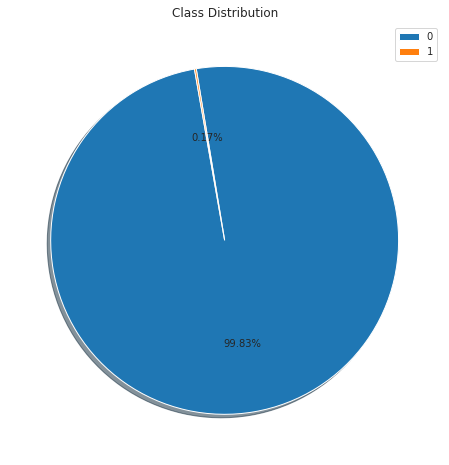

In [13]:
plt.figure(figsize=(8,8))

explode = [0,0.001]
plt.pie(df['class'].value_counts(), explode=explode,autopct='%1.2f%%', shadow=True,startangle=100)
plt.legend(labels=['0','1'])
plt.title('Class Distribution');

print('No Frauds', round(df['class'].value_counts()[0]/len(df) * 100,2), '% of the dataset')
print('Frauds', round(df['class'].value_counts()[1]/len(df) * 100,2), '% of the dataset')


### Outliers

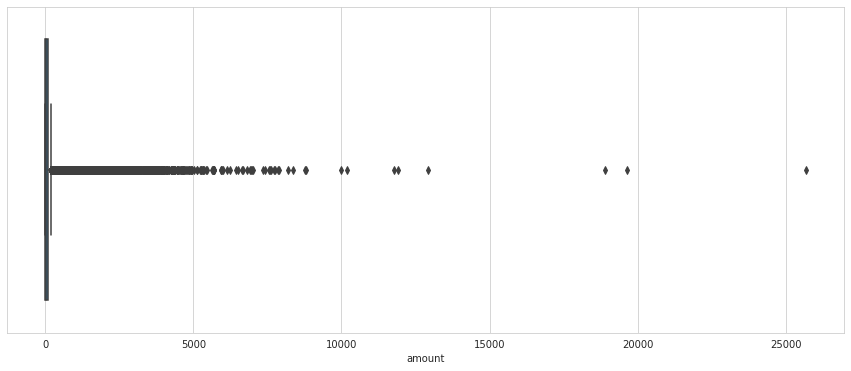

In [14]:
plt.figure(figsize = (15,6))
ax = sns.boxplot(x = "amount" , data = df)
plt.show();

In [15]:
df_1 = df.loc[df.amount < 10000]

In [16]:
df_1.shape

(283718, 31)

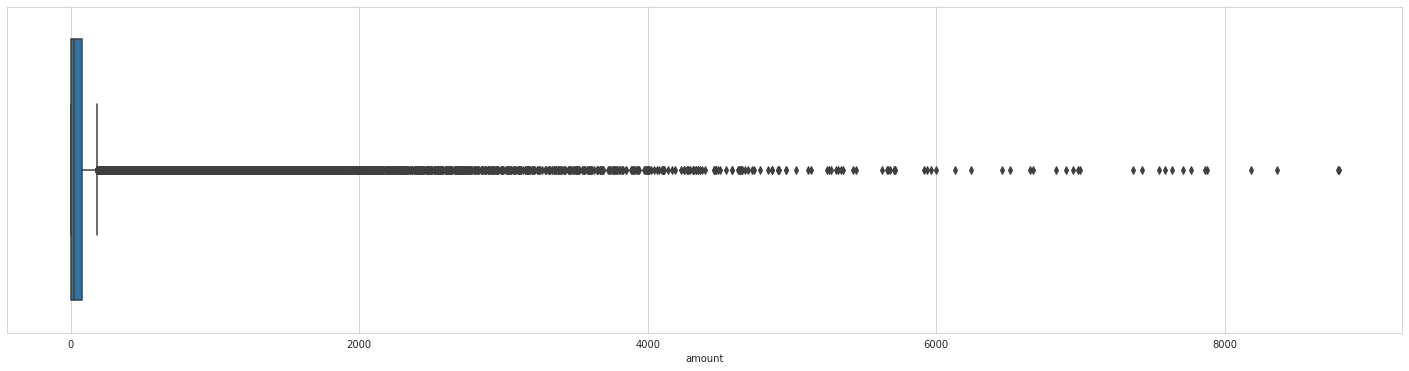

In [17]:
plt.figure(figsize = (25,6))
ax = sns.boxplot(x = "amount" , data = df_1)
plt.show();

In [18]:
df_2 = df.loc[df.amount < 5000]

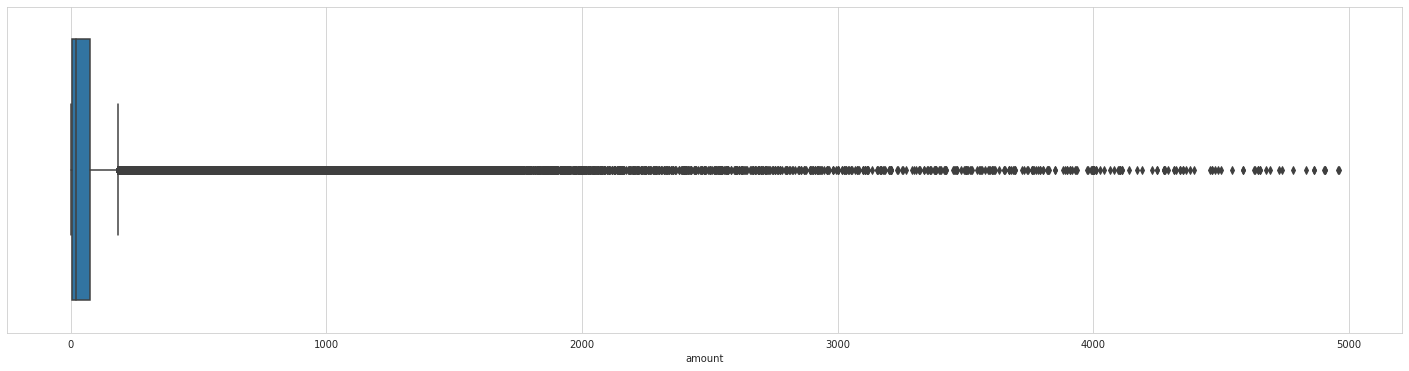

In [19]:
plt.figure(figsize = (25,6))
ax = sns.boxplot(x = "amount" , data = df_2)
plt.show();

In [20]:
df_3 = df.loc[df.amount < 1000]

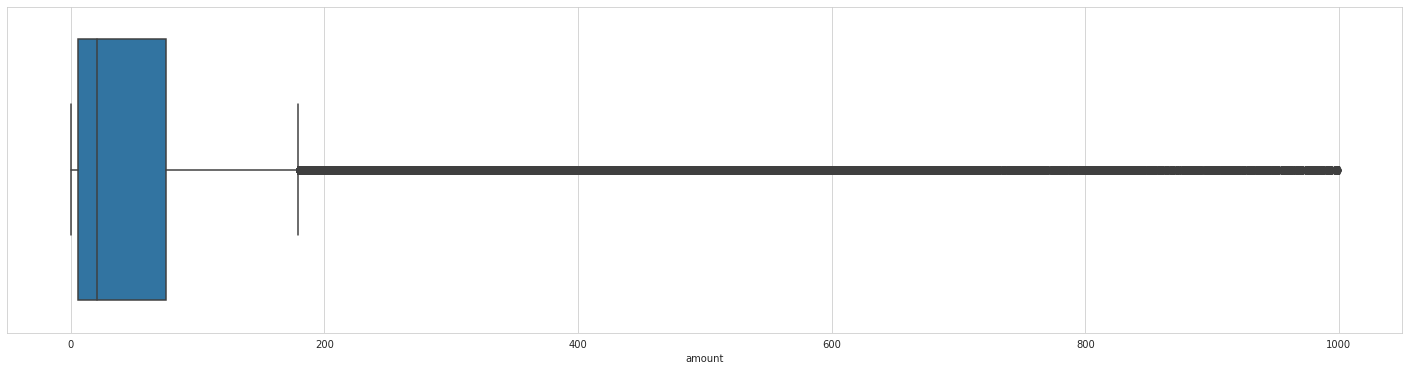

In [21]:
plt.figure(figsize = (25,6))
ax = sns.boxplot(x = "amount" , data = df_3)
plt.show();

In [22]:
df_3.describe()

,time,v1,v2,v3,v4,v5,v6,v7,v8,v9,v10,v11,v12,v13,v14,v15,v16,v17,v18,v19,v20,v21,v22,v23,v24,v25,v26,v27,v28,amount,class
count,280662.000,280662.000,280662.000,280662.000,280662.000,280662.000,280662.000,280662.000,280662.000,280662.000,280662.000,280662.000,280662.000,280662.000,280662.000,280662.000,280662.000,280662.000,280662.000,280662.000,280662.000,280662.000,280662.000,280662.000,280662.000,280662.000,280662.000,280662.000,280662.000,280662.000,280662.000
mean,94827.560,0.040,0.056,0.028,-0.015,0.037,-0.020,-0.036,0.009,0.002,0.007,-0.001,0.000,0.000,-0.003,0.000,-0.000,-0.000,0.000,0.003,-0.022,-0.007,0.005,0.007,-0.001,0.002,0.000,0.001,-0.000,70.068,0.002
std,47492.263,1.877,1.453,1.472,1.401,1.257,1.282,1.073,1.164,1.092,1.070,1.018,0.995,0.996,0.952,0.914,0.869,0.843,0.834,0.810,0.616,0.706,0.718,0.501,0.605,0.514,0.481,0.375,0.295,126.449,0.041
min,0.000,-46.855,-47.430,-33.681,-5.683,-23.670,-23.497,-43.557,-73.217,-13.434,-24.588,-4.797,-18.684,-5.792,-19.214,-4.499,-14.130,-25.163,-9.499,-4.933,-23.420,-34.830,-8.887,-36.666,-2.837,-7.496,-2.069,-22.566,-11.711,0.000,0.000
25%,54250.000,-0.896,-0.576,-0.859,-0.856,-0.669,-0.773,-0.559,-0.204,-0.639,-0.528,-0.762,-0.403,-0.649,-0.428,-0.581,-0.466,-0.484,-0.497,-0.451,-0.212,-0.229,-0.538,-0.158,-0.355,-0.316,-0.326,-0.069,-0.053,5.460,0.000
50%,84725.500,0.041,0.075,0.195,-0.030,-0.042,-0.282,0.032,0.025,-0.050,-0.090,-0.033,0.141,-0.013,0.047,0.050,0.067,-0.068,-0.003,0.006,-0.064,-0.032,0.010,-0.010,0.041,0.018,-0.052,0.002,0.011,21.200,0.000
75%,139320.000,1.323,0.808,1.037,0.727,0.620,0.379,0.554,0.330,0.596,0.458,0.739,0.617,0.663,0.487,0.650,0.521,0.397,0.499,0.460,0.127,0.181,0.531,0.147,0.439,0.351,0.239,0.091,0.076,74.910,0.000
max,172792.000,2.455,22.058,9.383,13.129,34.099,16.614,15.662,20.007,15.595,23.745,12.019,7.848,4.569,10.527,5.826,6.443,9.254,4.296,5.592,16.756,27.203,10.503,22.084,4.023,7.520,3.517,9.880,22.620,999.900,1.000


In [23]:
df_3["class"].value_counts()

0    280198
1       464
Name: class, dtype: int64

In [24]:
df=df_3.copy()

In [25]:
df.head()

,time,v1,v2,v3,v4,v5,v6,v7,v8,v9,v10,v11,v12,v13,v14,v15,v16,v17,v18,v19,v20,v21,v22,v23,v24,v25,v26,v27,v28,amount,class
0,0.000,-1.360,-0.073,2.536,1.378,-0.338,0.462,0.240,0.099,0.364,0.091,-0.552,-0.618,-0.991,-0.311,1.468,-0.470,0.208,0.026,0.404,0.251,-0.018,0.278,-0.110,0.067,0.129,-0.189,0.134,-0.021,149.620,0
1,0.000,1.192,0.266,0.166,0.448,0.060,-0.082,-0.079,0.085,-0.255,-0.167,1.613,1.065,0.489,-0.144,0.636,0.464,-0.115,-0.183,-0.146,-0.069,-0.226,-0.639,0.101,-0.340,0.167,0.126,-0.009,0.015,2.690,0
2,1.000,-1.358,-1.340,1.773,0.380,-0.503,1.800,0.791,0.248,-1.515,0.208,0.625,0.066,0.717,-0.166,2.346,-2.890,1.110,-0.121,-2.262,0.525,0.248,0.772,0.909,-0.689,-0.328,-0.139,-0.055,-0.060,378.660,0
3,1.000,-0.966,-0.185,1.793,-0.863,-0.010,1.247,0.238,0.377,-1.387,-0.055,-0.226,0.178,0.508,-0.288,-0.631,-1.060,-0.684,1.966,-1.233,-0.208,-0.108,0.005,-0.190,-1.176,0.647,-0.222,0.063,0.061,123.500,0
4,2.000,-1.158,0.878,1.549,0.403,-0.407,0.096,0.593,-0.271,0.818,0.753,-0.823,0.538,1.346,-1.120,0.175,-0.451,-0.237,-0.038,0.803,0.409,-0.009,0.798,-0.137,0.141,-0.206,0.502,0.219,0.215,69.990,0


In [26]:
df.shape

(280662, 31)

---
---


## 2. Data Preprocessing

#### Train - Test Split

As in this case, for extremely imbalanced datasets you may want to make sure that classes are balanced across train and test data.

In [27]:
from sklearn.model_selection import train_test_split

In [28]:
X = df.drop("class",axis=1)
y = df["class"]

In [29]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify = y)

## Train-Test Validation Checks
* link : https://docs.deepchecks.com/stable/user-guide/tabular/auto_quickstarts/plot_quick_train_test_validation.html

In [30]:
from deepchecks.tabular.suites import train_test_validation

validation_suite = train_test_validation()
suite_result = validation_suite.run(X_train, X_test)
# Note: the result can be saved as html using suite_result.save_as_html()
# or exported to json using suite_result.to_json()
suite_result

deepchecks - WARNING - Received a "pandas.DataFrame" instance. It is recommended to pass a "deepchecks.tabular.Dataset" instance by initializing it with the data and metadata, for example by doing "Dataset(dataframe, label=label, cat_features=cat_features)"
deepchecks - WARNING - It is recommended to initialize Dataset with categorical features by doing "Dataset(df, cat_features=categorical_list)". No categorical features were passed, therefore heuristically inferring categorical features in the data. 0 categorical features were inferred.
deepchecks - WARNING - Received a "pandas.DataFrame" instance. It is recommended to pass a "deepchecks.tabular.Dataset" instance by initializing it with the data and metadata, for example by doing "Dataset(dataframe, label=label, cat_features=cat_features)"
deepchecks - WARNING - It is recommended to initialize Dataset with categorical features by doing "Dataset(df, cat_features=categorical_list)". No categorical features were passed, therefore heuris

<!--
 ~ ----------------------------------------------------------------------------
 ~ Copyright (C) 2021-2022 Deepchecks (https://www.deepchecks.com)
 ~
 ~ This file is part of Deepchecks.
 ~ Deepchecks is distributed under the terms of the GNU Affero General
 ~ Public License (version 3 or later).
 ~ You should have received a copy of the GNU Affero General Public License
 ~ along with Deepchecks. If not, see .
 ~ ----------------------------------------------------------------------------
 ~
-->
<!DOCTYPE html>
 
 
 
 Train Test Validation Suite

#### Scaling

In [31]:
df.describe()

,time,v1,v2,v3,v4,v5,v6,v7,v8,v9,v10,v11,v12,v13,v14,v15,v16,v17,v18,v19,v20,v21,v22,v23,v24,v25,v26,v27,v28,amount,class
count,280662.000,280662.000,280662.000,280662.000,280662.000,280662.000,280662.000,280662.000,280662.000,280662.000,280662.000,280662.000,280662.000,280662.000,280662.000,280662.000,280662.000,280662.000,280662.000,280662.000,280662.000,280662.000,280662.000,280662.000,280662.000,280662.000,280662.000,280662.000,280662.000,280662.000,280662.000
mean,94827.560,0.040,0.056,0.028,-0.015,0.037,-0.020,-0.036,0.009,0.002,0.007,-0.001,0.000,0.000,-0.003,0.000,-0.000,-0.000,0.000,0.003,-0.022,-0.007,0.005,0.007,-0.001,0.002,0.000,0.001,-0.000,70.068,0.002
std,47492.263,1.877,1.453,1.472,1.401,1.257,1.282,1.073,1.164,1.092,1.070,1.018,0.995,0.996,0.952,0.914,0.869,0.843,0.834,0.810,0.616,0.706,0.718,0.501,0.605,0.514,0.481,0.375,0.295,126.449,0.041
min,0.000,-46.855,-47.430,-33.681,-5.683,-23.670,-23.497,-43.557,-73.217,-13.434,-24.588,-4.797,-18.684,-5.792,-19.214,-4.499,-14.130,-25.163,-9.499,-4.933,-23.420,-34.830,-8.887,-36.666,-2.837,-7.496,-2.069,-22.566,-11.711,0.000,0.000
25%,54250.000,-0.896,-0.576,-0.859,-0.856,-0.669,-0.773,-0.559,-0.204,-0.639,-0.528,-0.762,-0.403,-0.649,-0.428,-0.581,-0.466,-0.484,-0.497,-0.451,-0.212,-0.229,-0.538,-0.158,-0.355,-0.316,-0.326,-0.069,-0.053,5.460,0.000
50%,84725.500,0.041,0.075,0.195,-0.030,-0.042,-0.282,0.032,0.025,-0.050,-0.090,-0.033,0.141,-0.013,0.047,0.050,0.067,-0.068,-0.003,0.006,-0.064,-0.032,0.010,-0.010,0.041,0.018,-0.052,0.002,0.011,21.200,0.000
75%,139320.000,1.323,0.808,1.037,0.727,0.620,0.379,0.554,0.330,0.596,0.458,0.739,0.617,0.663,0.487,0.650,0.521,0.397,0.499,0.460,0.127,0.181,0.531,0.147,0.439,0.351,0.239,0.091,0.076,74.910,0.000
max,172792.000,2.455,22.058,9.383,13.129,34.099,16.614,15.662,20.007,15.595,23.745,12.019,7.848,4.569,10.527,5.826,6.443,9.254,4.296,5.592,16.756,27.203,10.503,22.084,4.023,7.520,3.517,9.880,22.620,999.900,1.000


In [32]:
scaler = MinMaxScaler()

In [33]:
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

---
---


## 3. Model Building
It was previously stated that you need to make class prediction with three different algorithms. As in this case, different approaches are required to obtain better performance on unbalanced data.

This dataset is severely **unbalanced** (most of the transactions are non-fraud). So the algorithms are much more likely to classify new observations to the majority class and high accuracy won't tell us anything. To address the problem of imbalanced dataset, we can use undersampling and oversampling or class weight and optimum thresold techniques. 

***Note***: 

- *Do not forget to import the necessary libraries and modules before starting the model building!*

- *If you are going to use the cross validation method to be more sure of the performance of your model for unbalanced data, you should make sure that the class distributions in the iterations are equal. For this case, you should use **[StratifiedKFold](https://www.analyseup.com/python-machine-learning/stratified-kfold.html)** instead of regular cross validation method.*

### Logistic Regression 

- The steps you are going to cover for this algorithm are as follows: 

   *i. Import Libraries*
   
   *ii. Model Training*
   
   *iii. Prediction and Model Evaluating (Apply StratifiedKFold) and Tuning*
   
   *iv. Plot Precision and Recall Curve*

***i. Import Libraries***

In [34]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [39]:
import pandas as pd
from sklearn.model_selection import StratifiedKFold

In [36]:
from sklearn.metrics import classification_report, confusion_matrix, log_loss, recall_score, accuracy_score, precision_score, f1_score, plot_confusion_matrix, roc_auc_score
from sklearn.metrics import make_scorer, average_precision_score


In [41]:
print('Class Ratio:',sum(df['class'])/len(df['class']))

Class Ratio: 0.0016532341392849763


***ii. Model Training***

In [43]:
log_model = LogisticRegression(class_weight='balanced', max_iter=100, random_state=42)

In [44]:
log_model.fit(X_train_scaled, y_train)

LogisticRegression(class_weight='balanced', random_state=42)

***iii. Prediction and Model Evaluating (Apply StratifiedKFold) and Tuning***

In [35]:
def eval_metric(model, X_train, y_train, X_test, y_test):
    y_pred_train = model.predict(X_train)
    y_pred_test = model.predict(X_test)
    
    print("TEST REPORT")
    print(classification_report(y_test, y_pred_test))
    plot_confusion_matrix(model, X_test, y_test);

    print("\n"*3, "-*"*30)
    print("TRAIN REPORT")
    print(classification_report(y_train, y_pred_train))
    plot_confusion_matrix(model, X_train, y_train)
    plt.show()

TEST REPORT
              precision    recall  f1-score   support

           0       1.00      0.97      0.99     56040
           1       0.06      0.91      0.11        93

    accuracy                           0.97     56133
   macro avg       0.53      0.94      0.55     56133
weighted avg       1.00      0.97      0.99     56133




 -*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*
TRAIN REPORT
              precision    recall  f1-score   support

           0       1.00      0.98      0.99    224158
           1       0.06      0.92      0.11       371

    accuracy                           0.98    224529
   macro avg       0.53      0.95      0.55    224529
weighted avg       1.00      0.98      0.99    224529



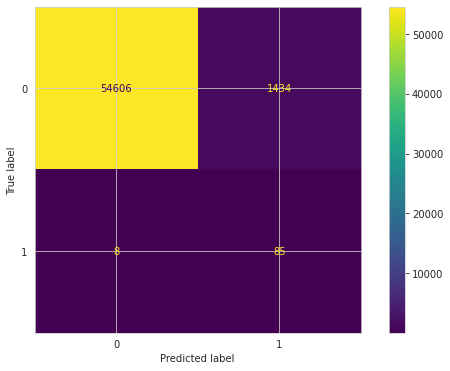

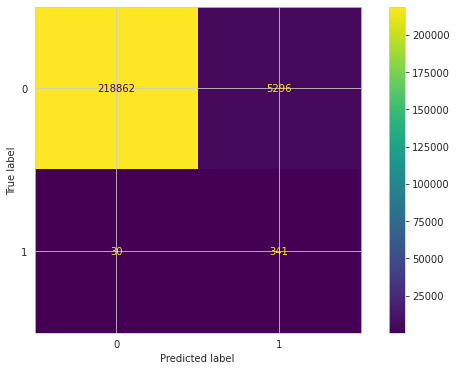

In [46]:
eval_metric(log_model, X_train_scaled, y_train, X_test_scaled, y_test)


In [47]:
kfold = StratifiedKFold(n_splits=10, random_state=42, shuffle=True)

In [48]:
scoring = {"precision_fraud": make_scorer(precision_score, labels=1),
           "recall_fraud": make_scorer(recall_score, labels=1),
           "f1_fraud": make_scorer(f1_score, labels=1)}

In [50]:
from sklearn.model_selection import cross_validate

In [52]:
from sklearn.utils import class_weight

In [51]:
model = LogisticRegression(class_weight='balanced', max_iter=100, random_state=42)

scores = cross_validate(log_model, X_train_scaled, y_train,
                         scoring=scoring, cv=kfold, return_train_score=True)
df_scores = pd.DataFrame(scores, index=range(1, 11))
df_scores.mean()[2:]

test_precision_fraud    0.059
train_precision_fraud   0.060
test_recall_fraud       0.905
train_recall_fraud      0.920
test_f1_fraud           0.111
train_f1_fraud          0.113
dtype: float64

In [40]:
print('Class Ratio:',sum(df['class'])/len(df['class']))

Class Ratio: 0.0016532341392849763



You're evaluating "accuracy score"? Is your performance metric reflect real success? You may need to use different metrics to evaluate performance on unbalanced data. You should use **[precision and recall metrics](https://scikit-learn.org/stable/auto_examples/model_selection/plot_precision_recall.html#:~:text=The%20precision%2Drecall%20curve%20shows,a%20low%20false%20negative%20rate.)**.

***iv. Plot Precision and Recall Curve***


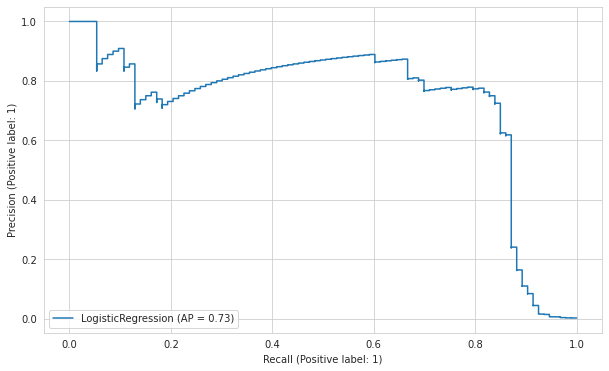

In [57]:
from sklearn.metrics import precision_recall_curve, plot_precision_recall_curve, plot_roc_curve, roc_auc_score
plot_precision_recall_curve(log_model, X_test_scaled, y_test)

- Didn't the performance of the model you implemented above satisfy you? If your model is biased towards the majority class and minority class matrics is not sufficient, apply "unbalanced data tecniques".

***v. Apply Model Evaluation Checks***
* link : https://docs.deepchecks.com/stable/user-guide/tabular/auto_quickstarts/plot_quick_model_evaluation.html

In [58]:
from deepchecks.tabular.suites import model_evaluation

evaluation_suite = model_evaluation()
suite_result = evaluation_suite.run(X_train_scaled,X_test_scaled, log_tuned)
# Note: the result can be saved as html using suite_result.save_as_html()
# or exported to json using suite_result.to_json()
suite_result.show()

NameError: ignored

### Logistic Regression with Unbalanced Data Techniques

- The steps you are going to cover for this algorithm are as follows: 

   *i. Import Libraries*
   
   *ii. Model Training*
   
   *iii. Prediction and Model Evaluating (Apply StratifiedKFold) and Tuning*
   
   *iv. Plot Precision and Recall Curve*

***i. Train-Test Split (Again)***

***ii. Model Training***

***Prediction and Model Evaluating (Apply StratifiedKFold) and Tuning***

***iv.  Plot Precision and Recall Curve***


***v. Apply Model Evaluation Checks***
* link : https://docs.deepchecks.com/stable/user-guide/tabular/auto_quickstarts/plot_quick_model_evaluation.html

### Random Forest Classifier with Unbalanced Data Techniques

- The steps you are going to cover for this algorithm are as follows:

   *i. Model Training*
   
   *ii. Prediction and Model Evaluating (Apply StratifiedKFold) and Tuning*
   
   *iii. Plot Precision and Recall Curve*
   

***i. Model Training***

In [62]:
from sklearn.ensemble import  RandomForestClassifier

In [63]:
rf_w = RandomForestClassifier(class_weight="balanced",
                            random_state=42)

In [64]:
rf_w.fit(X_train_scaled, y_train)

RandomForestClassifier(class_weight='balanced', random_state=42)

TEST REPORT
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56040
           1       0.93      0.76      0.84        93

    accuracy                           1.00     56133
   macro avg       0.97      0.88      0.92     56133
weighted avg       1.00      1.00      1.00     56133




 -*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*
TRAIN REPORT
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    224158
           1       1.00      0.99      1.00       371

    accuracy                           1.00    224529
   macro avg       1.00      1.00      1.00    224529
weighted avg       1.00      1.00      1.00    224529



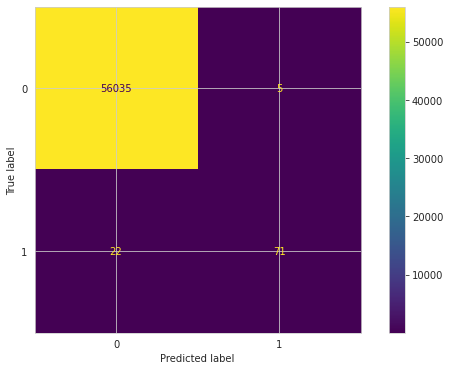

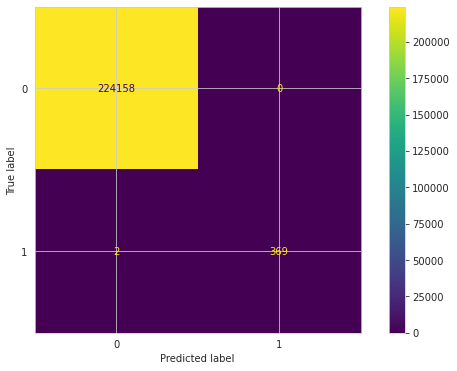

In [65]:
eval_metric(rf_w, X_train_scaled, y_train, X_test_scaled, y_test)

***ii. Prediction and Model Evaluating (Apply StratifiedKFold) and Tuning***

In [66]:
kfold = StratifiedKFold(n_splits=3, random_state=42, shuffle=True)

In [67]:
rf_model = RandomForestClassifier(class_weight="balanced",
                           random_state=42)

scores = cross_validate(rf_model, X_train_scaled, y_train,
                        scoring=scoring, cv=kfold, return_train_score=True)
df_scores = pd.DataFrame(scores, index=range(1, 4))
df_scores.mean()[2:]

test_precision_fraud    0.941
train_precision_fraud   1.000
test_recall_fraud       0.728
train_recall_fraud      1.000
test_f1_fraud           0.820
train_f1_fraud          1.000
dtype: float64

GridSearchCV

In [68]:
rf_w_grid = RandomForestClassifier(class_weight="balanced", random_state=42)


In [69]:
rf_w_grid.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': 'balanced',
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': 42,
 'verbose': 0,
 'warm_start': False}

In [70]:
param_grid = {'n_estimators': [50, 100],
              'max_features': ['sqrt', 'log2'],
              'max_depth': [5, 7], 
              'min_samples_split': [2, 3]}


In [72]:
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score, cross_validate

In [76]:
RF_grid_w = GridSearchCV(estimator=rf_w_grid,
                             param_grid=param_grid,
                             scoring="recall",
                             n_jobs=-1, verbose=2)

In [77]:
RF_grid_w.fit(X_train_scaled, y_train)

Fitting 5 folds for each of 16 candidates, totalling 80 fits


GridSearchCV(estimator=RandomForestClassifier(class_weight='balanced',
                                              random_state=42),
             n_jobs=-1,
             param_grid={'max_depth': [5, 7], 'max_features': ['sqrt', 'log2'],
                         'min_samples_split': [2, 3],
                         'n_estimators': [50, 100]},
             scoring='recall', verbose=2)

In [78]:
RF_grid_w.best_params_


{'max_depth': 5,
 'max_features': 'sqrt',
 'min_samples_split': 3,
 'n_estimators': 50}

Tuned Model

In [79]:
rf_w_tuned = RandomForestClassifier(n_estimators=50,
                                    max_features='sqrt',
                                    max_depth=5,
                                    min_samples_split=3)

In [80]:
rf_w_tuned.fit(X_train_scaled, y_train)

RandomForestClassifier(max_depth=5, max_features='sqrt', min_samples_split=3,
                       n_estimators=50)

TEST REPORT
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56040
           1       0.93      0.72      0.81        93

    accuracy                           1.00     56133
   macro avg       0.97      0.86      0.91     56133
weighted avg       1.00      1.00      1.00     56133




 -*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*
TRAIN REPORT
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    224158
           1       0.97      0.74      0.84       371

    accuracy                           1.00    224529
   macro avg       0.98      0.87      0.92    224529
weighted avg       1.00      1.00      1.00    224529



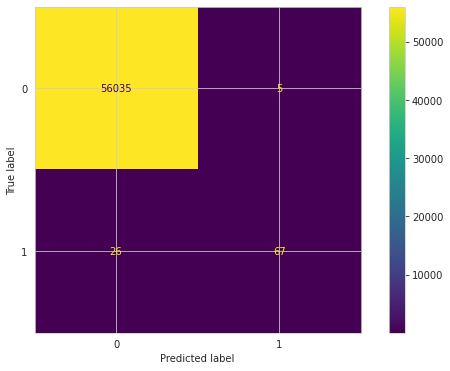

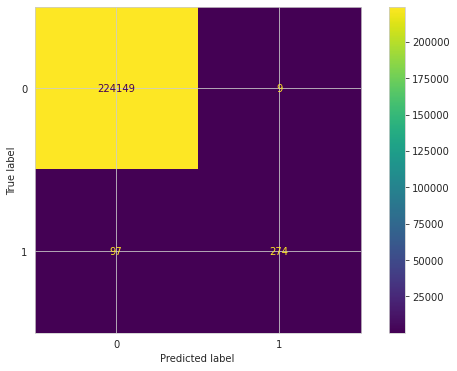

In [81]:
eval_metric(rf_w_tuned, X_train_scaled, y_train, X_test_scaled, y_test)

***iii. Plot Precision and Recall Curve***


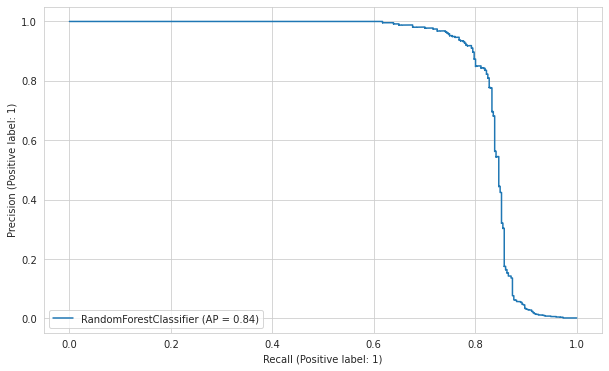

In [82]:
plot_precision_recall_curve(rf_w_tuned, X_train_scaled, y_train);


Prediction

In [83]:
y_pred = rf_w_tuned.predict(X_test_scaled)
y_train_pred = rf_w_tuned.predict(X_train_scaled)

rf_w_f1 = f1_score(y_test, y_pred)
rf_w_acc = accuracy_score(y_test, y_pred)
rf_w_recall = recall_score(y_test, y_pred)
rf_w_auc = roc_auc_score(y_test, y_pred)
rf_w_precision = precision_score(y_test, y_pred)


***v. Apply Model Evaluation Checks***
* link : https://docs.deepchecks.com/stable/user-guide/tabular/auto_quickstarts/plot_quick_model_evaluation.html

In [87]:
from deepchecks.tabular.suites import model_evaluation

train_ds = Dataset(X_train_scaled, label=y_train, cat_features=[])
test_ds = Dataset(X_test_scaled, label=y_test, cat_features=[])

evaluation_suite = model_evaluation()
suite_result = evaluation_suite.run(train_ds, test_ds, rf_w_tuned)
# Note: the result can be saved as html using suite_result.save_as_html()
# or exported to json using suite_result.to_json()
suite_result.show()

NameError: ignored

### XGBoost Classifier with Unbalanced Data Techniques

- The steps you are going to cover for this algorithm are as follows:

   *i. Model Training*
   
   *ii. Prediction and Model Evaluating (Apply StratifiedKFold) and Tuning*
   
   *iii. Plot Precision and Recall Curve*
   

***i. Model Training***

In [88]:
from xgboost import XGBClassifier
import pickle
import plotly.express as px
import plotly.figure_factory as ff
from plotly import tools
from plotly.offline import plot, iplot

In [89]:
classes_weights = class_weight.compute_sample_weight(
    class_weight='balanced', y=y_train
)

In [91]:
xgb = XGBClassifier(sample_weight=classes_weights, random_state=42)

In [92]:
xgb.fit(X_train_scaled,y_train)

XGBClassifier(random_state=42,
              sample_weight=array([0.50082754, 0.50082754, 0.50082754, ..., 0.50082754, 0.50082754,
       0.50082754]))

TEST REPORT
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56040
           1       0.91      0.84      0.87        93

    accuracy                           1.00     56133
   macro avg       0.95      0.92      0.94     56133
weighted avg       1.00      1.00      1.00     56133




 -*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*
TRAIN REPORT
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    224158
           1       0.98      0.82      0.89       371

    accuracy                           1.00    224529
   macro avg       0.99      0.91      0.95    224529
weighted avg       1.00      1.00      1.00    224529



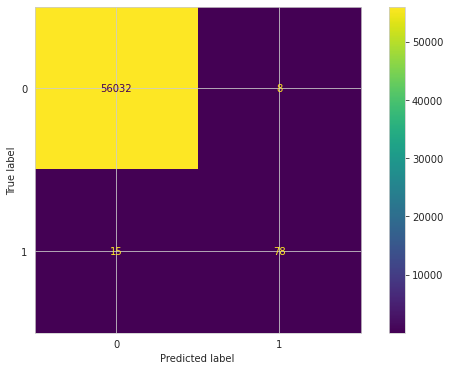

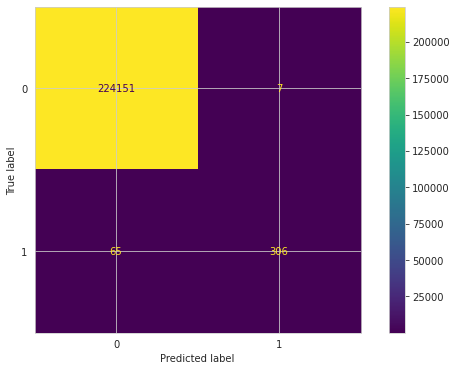

In [94]:
eval_metric(xgb, X_train_scaled, y_train, X_test_scaled, y_test)

***ii. Prediction and Model Evaluating (Apply StratifiedKFold) and Tuning***

In [ ]:
fold = StratifiedKFold(n_splits=3, random_state=42, shuffle=True)

In [ ]:
scoring = {"fraud_precision": make_scorer(precision_score, labels=1),
           "fraud_recall": make_scorer(recall_score, labels=1),
           "fraud_f1": make_scorer(f1_score, labels=1)}

In [ ]:
model = XGBClassifier(class_weight='balanced', random_state=42)

scores = cross_validate(model, X_train_scaled, y_train,
                        scoring=scoring, cv=fold, return_train_score=True)
df_scores = pd.DataFrame(scores, index=range(1, 4))
df_scores.mean()[2:]

In [ ]:
xgb_grid = XGBClassifier(class_weight='balanced', random_state=42)

In [ ]:
fraud_recall = make_scorer(recall_score, average=None, labels=1)

In [ ]:
grid_xgb = GridSearchCV(estimator= xgb_grid,
                         param_grid=param_grid,
                         scoring=fraud_recall,
                         n_jobs=-1, verbose=2)

In [ ]:
grid_xgb.fit(X_train_scaled, y_train)

In [ ]:
grid_xgb.best_params_

In [ ]:
xgb_tuned = XGBClassifier(class_weight='balanced', colsample_bytree=0.8, learning_rate=0.1,
                          max_depth=3, n_estimators=50, random_state=101,
                          subsample=0.8)

In [ ]:
xgb_tuned.fit(X_train_scaled, y_train)

In [ ]:
eval_metric(xgb_tuned, X_train_scaled, y_train, X_test_scaled, y_test)

In [ ]:
from deepchecks.tabular.suites import model_evaluation

train_ds = Dataset(X_train_scaled, label=y_train, cat_features=[])
test_ds = Dataset(X_test_scaled, label=y_test, cat_features=[])

evaluation_suite = model_evaluation()
suite_result = evaluation_suite.run(train_ds, test_ds, xgb)
# Note: the result can be saved as html using suite_result.save_as_html()
# or exported to json using suite_result.to_json()
suite_result.show()

***iii. Plot Precision and Recall Curve***


In [ ]:
plot_precision_recall_curve(xgb_w, X_test_scaled, y_test)

In [ ]:
y_pred = xgb_w.predict(X_test_scaled)
y_train_pred = xgb_w.predict(X_train_scaled)

In [ ]:
xgb_f1 = f1_score(y_test, y_pred)
xgb_acc = accuracy_score(y_test, y_pred)
xgb_recall = recall_score(y_test, y_pred)
xgb_auc = roc_auc_score(y_test, y_pred)
xgb_precision = precision_score(y_test, y_pred)

In [ ]:
xgb_Pred = {"Actual": y_test, "xgb_Pred": y_pred}
xgb_Pred = pd.DataFrame.from_dict(xgb_Pred)

In [ ]:
xgb_Pred.drop("Actual", axis=1, inplace=True)
Model_Preds = pd.merge(Model_Preds, xgb_Pred,
                       left_index=True, right_index=True)

In [ ]:
Model_Preds.sample(5)

***v. Apply Model Evaluation Checks***
* link : https://docs.deepchecks.com/stable/user-guide/tabular/auto_quickstarts/plot_quick_model_evaluation.html

In [ ]:
from deepchecks.tabular.suites import model_evaluation

train_ds = Dataset(X_train_scaled, label=y_train, cat_features=[])
test_ds = Dataset(X_test_scaled, label=y_test, cat_features=[])

evaluation_suite = model_evaluation()
suite_result = evaluation_suite.run(train_ds, test_ds, xgb_w)
# Note: the result can be saved as html using suite_result.save_as_html()
# or exported to json using suite_result.to_json()
suite_result.show()

### Neural Network

In the final step, you will make classification with Neural Network which is a Deep Learning algorithm. 

Neural networks are a series of algorithms that mimic the operations of a human brain to recognize relationships between vast amounts of data. They are used in a variety of applications in financial services, from forecasting and marketing research to fraud detection and risk assessment.

A neural network contains layers of interconnected nodes. Each node is a perceptron and is similar to a multiple linear regression. The perceptron feeds the signal produced by a multiple linear regression into an activation function that may be nonlinear.

In a multi-layered perceptron (MLP), perceptrons are arranged in interconnected layers. The input layer collects input patterns. The output layer has classifications or output signals to which input patterns may map. 

Hidden layers fine-tune the input weightings until the neural network’s margin of error is minimal. It is hypothesized that hidden layers extrapolate salient features in the input data that have predictive power regarding the outputs.

You will discover **[how to create](https://towardsdatascience.com/building-our-first-neural-network-in-keras-bdc8abbc17f5)** your deep learning neural network model in Python using **[Keras](https://keras.io/about/)**. Keras is a powerful and easy-to-use free open source Python library for developing and evaluating deep learning models.

- The steps you are going to cover for this algorithm are as follows:

   *i. Import Libraries*
   
   *ii. Define Model*
    
   *iii. Compile Model*
   
   *iv. Fit Model*
   
   *v. Prediction and Model Evaluating*
   
   *vi. Plot Precision and Recall Curve*

***i. Import Libraries***

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, BatchNormalization
from tensorflow.keras.callbacks import EarlyStopping
from keras.wrappers.scikit_learn import KerasClassifier
from tensorflow.keras.optimizers import Adam, Adadelta, RMSprop, Nadam
from sklearn.utils import class_weight

***ii. Define Model***

In [ ]:
X = df[['v14','v10','v12','v17','v11','v16','v3','v4','v9','v18','v7']]
y = df['class']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size = 0.20, random_state=42)

In [ ]:
print("Train features shape : ", X_train.shape)
print("Test features shape  : ", X_test.shape)

Train features shape :  (224529, 11)
Test features shape  :  (56133, 11)


In [ ]:
scaler=RobustScaler()

In [ ]:
X_train = scaler.fit_transform(X_train)

In [ ]:
X_test  = scaler.transform(X_test)

In [ ]:
tf.random.set_seed(101)

model = Sequential()

model.add(Dense(64, input_dim = X_train.shape[1]))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dense(32))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dense(16))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dense(1, activation='sigmoid'))

***iii. Compile Model***

In [ ]:
opt = Adam(lr = 0.005)
model.compile(optimizer=opt, loss='binary_crossentropy', metrics=['Recall'])

***iv. Fit Model***

In [ ]:
early_stop=EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=25)

In [ ]:
model.fit(X_train, y_train, validation_split=0.15, batch_size=128, epochs=100, verbose=1, callbacks=[early_stop])

Epoch 1/100
1492/1492 [==============================] - 12s 6ms/step - loss: 0.0356 - recall: 0.7220 - val_loss: 0.0043 - val_recall: 0.8103
Epoch 2/100
1492/1492 [==============================] - 10s 7ms/step - loss: 0.0036 - recall: 0.7508 - val_loss: 0.0039 - val_recall: 0.8621
Epoch 3/100
1492/1492 [==============================] - 10s 6ms/step - loss: 0.0033 - recall: 0.7444 - val_loss: 0.0031 - val_recall: 0.8103
Epoch 4/100
1492/1492 [==============================] - 9s 6ms/step - loss: 0.0032 - recall: 0.7700 - val_loss: 0.0026 - val_recall: 0.7759
Epoch 5/100
1492/1492 [==============================] - 12s 8ms/step - loss: 0.0031 - recall: 0.7636 - val_loss: 0.0026 - val_recall: 0.8103
Epoch 6/100
1492/1492 [==============================] - 10s 7ms/step - loss: 0.0029 - recall: 0.7827 - val_loss: 0.0031 - val_recall: 0.8103
Epoch 7/100
1492/1492 [==============================] - 9s 6ms/step - loss: 0.0029 - recall: 0.7636 - val_loss: 0.0026 - val_recall: 0.8103
Epoch 8/

***v. Prediction and Model Evaluating***

In [ ]:
loss_df = pd.DataFrame(model.history.history)
loss_df.plot()

In [ ]:
loss, recall = model.evaluate(X_test, y_test, verbose=0)
print("loss : ", loss)
print("recall : ", recall)

loss :  0.0042831567116081715
recall :  0.8172042965888977


In [ ]:
y_pred = model.predict(X_test) > 0.5

print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

1755/1755 [==============================] - 3s 2ms/step
[[56021    19]
 [   17    76]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56040
           1       0.80      0.82      0.81        93

    accuracy                           1.00     56133
   macro avg       0.90      0.91      0.90     56133
weighted avg       1.00      1.00      1.00     56133



In [ ]:
y_train_pred = model.predict(X_train) > 0.5

print(confusion_matrix(y_train, y_train_pred))
print(classification_report(y_train, y_train_pred))

7017/7017 [==============================] - 12s 2ms/step
[[224117     41]
 [    40    331]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    224158
           1       0.89      0.89      0.89       371

    accuracy                           1.00    224529
   macro avg       0.94      0.95      0.95    224529
weighted avg       1.00      1.00      1.00    224529



***vi. Plot Precision and Recall Curve***

In [ ]:
from sklearn.metrics import average_precision_score,precision_recall_curve,plot_precision_recall_curve

1755/1755 [==============================] - 4s 2ms/step


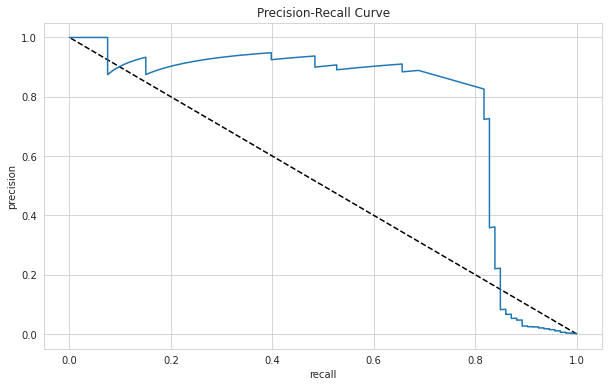

In [ ]:
y_pred_proba = model.predict(X_test)
precision, recall, thresholds = precision_recall_curve(y_test, y_pred_proba)
plt.plot([1,0],[0,1],'k--')
plt.plot(recall, precision)
plt.xlabel('recall')
plt.ylabel('precision')
plt.title('Precision-Recall Curve')
plt.show() 

In [ ]:
average_precision_score(y_test, y_pred_proba)

***v. Apply Model Evaluation Checks***
* link : https://docs.deepchecks.com/stable/user-guide/tabular/auto_quickstarts/plot_quick_model_evaluation.html

In [ ]:
from deepchecks.tabular import Dataset

# Categorical features can be heuristically inferred, however we
# recommend to state them explicitly to avoid misclassification.

# Metadata attributes are optional. Some checks will run only if specific attributes are declared.

train_ds = Dataset(X_train, label=y_train, cat_features=[])
test_ds = Dataset(X_test, label=y_test, cat_features=[])

AssertionError: ignored

In [ ]:
from deepchecks.tabular.suites import model_evaluation

evaluation_suite = model_evaluation()
suite_result = evaluation_suite.run(train_ds, test_ds, gbr)
# Note: the result can be saved as html using suite_result.save_as_html()
# or exported to json using suite_result.to_json()
suite_result.show()

NameError: ignored

## 4. Model Deployement
You cooked the food in the kitchen and moved on to the serving stage. The question is how do you showcase your work to others? Model Deployement helps you showcase your work to the world and make better decisions with it. But, deploying a model can get a little tricky at times. Before deploying the model, many things such as data storage, preprocessing, model building and monitoring need to be studied.

Deployment of machine learning models, means making your models available to your other business systems. By deploying models, other systems can send data to them and get their predictions, which are in turn populated back into the company systems. Through machine learning model deployment, can begin to take full advantage of the model you built.

Data science is concerned with how to build machine learning models, which algorithm is more predictive, how to design features, and what variables to use to make the models more accurate. However, how these models are actually used is often neglected. And yet this is the most important step in the machine learning pipline. Only when a model is fully integrated with the business systems, real values ​​can be extract from its predictions.

After doing the following operations in this notebook, jump to a proper IDE and create your web app with Streamlit API.

### Save and Export the Best Model


### Save and Export Variables

___

<p style="text-align: center;"><img src="https://docs.google.com/uc?id=1lY0Uj5R04yMY3-ZppPWxqCr5pvBLYPnV" class="img-fluid" alt="CLRSWY"></p>

___